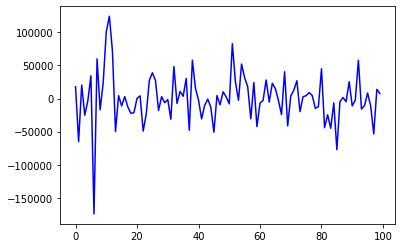

In [55]:
import matplotlib.pyplot as plt

#laplace noise generating code 1
from math import log
from random import random

def laprnd1(scale):
    def exp_sample(mean):
        return -mean*log(1.0 - random())
    e1 = exp_sample(scale)
    e2 = exp_sample(scale)
    return e1 - e2


sample_list1 = []
for i in range(100):
    sample_list1.append(laprnd1(10000/(1.0/3)))
# print(sample_list)
# avg = np.array(sample_list1).mean()
# print(avg)

plt.figure(1)
# plt.ylim(-50, 50)
plt.plot(sample_list1, '-b')
# plt.plot(laplace.pdf(sample_list1))

plt.show()

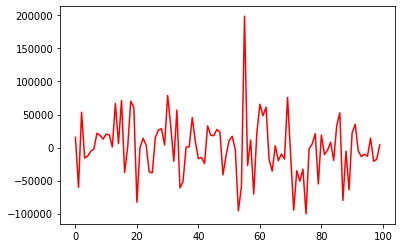

In [56]:
# #laplace noise generating code 2 by sum
from scipy.stats import laplace
import numpy as np
from sympy import Symbol, exp, sqrt, pi, Integral
import math

def laprnd2(loc,scale):
    s = laplace.rvs(loc, scale, None)
    return s

sample_list2 = []

for i in range(100):
    sample_list2.append(laprnd2(0, (10000/(1.0/3))))
# print(sample_list1)
# avg = np.array(sample_list2).mean()
# print(avg)

plt.figure(2)
# plt.ylim(-50, 50)
plt.plot(sample_list2, '-r')
plt.show()

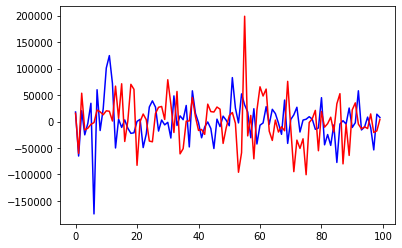

laprnd 1 평균 :  790.6019436368614 laprnd 2 평균 :  651.6379118498661


In [57]:
plt.plot(sample_list1, '-b')
plt.plot(sample_list2, '-r')
plt.show()
print('laprnd 1 평균 : ',np.array(sample_list1).mean(), 'laprnd 2 평균 : ', np.array(sample_list2).mean())

In [58]:
loc, scale, size = 0., (10000/4)/(4/4), 10
s = np.random.laplace(loc, scale, size)
s
# x = np.arange(-100., 100., 10.)
# pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
# plt.plot(x, pdf)

array([ 2030.81695778, -2204.57902989, -2032.08655574,   881.59707433,
         203.12551872, -1226.49897551,  6352.76362283, -1022.44442765,
       -1378.71892514, -1021.56462416])

mean : 68.71313036020582
std : 138.24952536518882
shape : 0.24703140605469986
scale : 278.1554437049626 

gamma.pdf(0.24703, 0.000000, 278.15544)


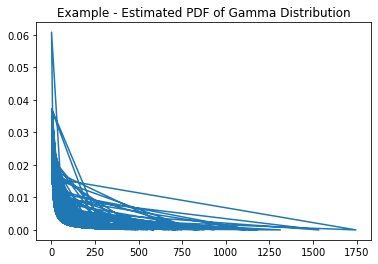

91.81  + -176.95527 = -85.14527
10.02  + 4.04967 = 14.06967
27.61  + -71.67443 = -44.06443
50.48  + -9.33117 = 41.14883
3.34  + -23.32473 = -19.98473
26.35  + 2.98608 = 29.33608
21.0  + -1.86810 = 19.13190
79.27  + 296.53517 = 375.80517
31.04  + -192.87858 = -161.83858
8.85  + 508.09149 = 516.94149


Text(0.5, 1.0, 'original vs noisy')

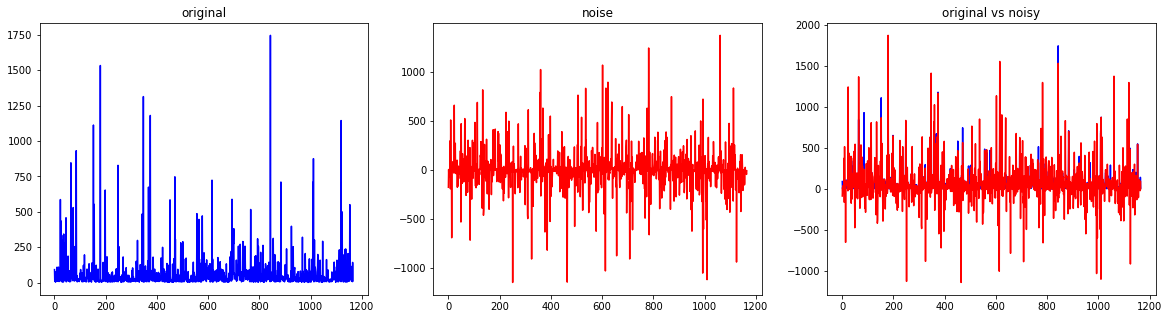

In [59]:
# 감마 분포에 들어갈 인자인 shape, scale 파라미터 계산을 위한
# 데이터의 평균과 표준편차 계산

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma


# calculate parameters for gamma distribution
def calculateGammaParams(data=[]):
    mean = np.mean(data)
    std = np.std(data)
    shape = (mean/std)**2
    scale = (std**2)/mean
    
    print('mean :', mean)
    print('std :', std)
    print('shape :', shape)
    print('scale :',scale,'\n')
    
    return (shape, 0, scale)


# 2 random noise sampling from gamma distribution
def two_gammarnd_diff():
    r = gamma.rvs(eshape, eloc, escale, size=2)
    print(r)
    print(r[0]-r[1])
    

# get list of difference between two gamma random values
def two_gammarnd_diff_list(n=0):
    rnd_diff_list=[]
    for i in range(n):
        r = gamma.rvs(eshape, eloc, escale, size=2)
        rnd_diff_list.append(r[0]-r[1])
    return rnd_diff_list


# test code
data = [91.81, 10.02, 27.61, 50.48, 3.34, 26.35, 21.0, 79.27, 31.04, 8.85, 109.2, 15.52, 11.03, 41.09, 10.75, 96.43, 109.52, 33.28, 7.66, 65.44, 52.43, 19.25, 10.97, 586.52, 56.91, 157.18, 434.74, 16.07, 334.43, 6.63, 108.41, 4.45, 42.03, 39.75, 300.17, 4.37, 343.19, 32.04, 42.57, 29.53, 276.75, 15.43, 117.67, 75.47, 292.43, 457.91, 5.49, 17.69, 10.31, 58.91, 76.94, 37.39, 64.46, 187.25, 30.0, 9.94, 83.05, 51.11, 17.68, 81.98, 4.41, 33.24, 20.36, 8.8, 846.0, 154.24, 311.09, 120.72, 65.13, 25.52, 50.9, 14.27, 17.74, 529.82, 35.13, 124.68, 13.21, 88.24, 12.12, 254.32, 22.09, 61.7, 88.08, 18.75, 14.34, 931.67, 19.98, 50.86, 7.71, 5.57, 8.81, 14.49, 26.74, 13.21, 8.92, 26.65, 10.09, 7.74, 21.23, 66.35, 31.81, 36.61, 92.29, 26.18, 20.55, 17.18, 35.44, 6.63, 69.0, 8.81, 19.87, 5.46, 29.81, 122.01, 57.83, 33.04, 9.91, 196.0, 34.26, 34.31, 36.55, 7.74, 6.68, 6.83, 18.83, 6.6, 50.78, 95.65, 53.91, 81.62, 57.96, 26.72, 76.25, 5.48, 4.43, 133.04, 33.37, 45.26, 30.51, 9.98, 11.08, 28.95, 71.25, 70.65, 3.34, 12.28, 111.67, 139.86, 23.34, 30.0, 26.38, 33.51, 1112.64, 25.87, 148.59, 552.79, 11.11, 47.8, 7.8, 9.98, 7.69, 85.46, 3.59, 122.71, 32.09, 82.51, 12.14, 12.57, 8.8, 49.61, 95.41, 26.99, 13.29, 4.57, 7.78, 4.4, 6.66, 12.17, 12.18, 1533.01, 22.95, 15.93, 14.82, 2.2, 12.04, 9.94, 17.64, 6.66, 18.64, 83.66, 142.99, 30.76, 67.57, 9.88, 46.44, 19.5, 22.2, 43.1, 653.67, 9.86, 7.69, 7.74, 27.19, 38.64, 12.32, 182.34, 43.13, 3.28, 14.32, 69.78, 32.2, 17.66, 18.67, 4.4, 9.05, 56.94, 33.32, 13.2, 15.07, 12.73, 3.32, 35.44, 14.35, 66.68, 51.28, 6.86, 75.49, 5.54, 21.0, 24.2, 38.1, 13.31, 7.78, 5.76, 51.86, 11.09, 20.71, 36.74, 21.97, 10.36, 32.04, 96.94, 13.93, 51.84, 6.88, 27.58, 100.56, 20.97, 828.16, 6.63, 32.15, 19.92, 253.23, 25.35, 23.35, 17.6, 43.18, 19.36, 13.7, 3.31, 22.99, 26.58, 4.43, 2.22, 55.46, 22.34, 13.24, 86.18, 181.29, 52.15, 5.52, 21.12, 34.24, 49.78, 14.37, 39.73, 78.22, 26.6, 20.19, 26.57, 105.8, 11.08, 46.47, 52.82, 13.46, 8.0, 7.74, 49.73, 4.4, 5.44, 51.7, 28.64, 8.95, 9.15, 4.46, 21.03, 29.92, 19.89, 4.38, 19.94, 7.77, 23.43, 57.07, 86.5, 12.82, 103.85, 39.63, 8.83, 42.32, 17.02, 14.29, 16.75, 24.4, 27.97, 8.83, 8.91, 24.23, 6.58, 30.97, 150.58, 122.73, 17.69, 37.11, 11.05, 298.23, 25.58, 9.91, 38.85, 17.24, 82.17, 42.11, 3.29, 38.63, 27.55, 18.22, 127.16, 57.66, 34.45, 41.26, 45.91, 9.88, 34.48, 484.33, 58.42, 30.09, 6.69, 254.49, 1313.58, 39.89, 3.31, 7.83, 10.98, 13.21, 67.78, 7.77, 117.72, 20.03, 83.23, 31.28, 38.97, 6.63, 6.63, 36.6, 22.12, 154.57, 112.65, 19.88, 674.18, 83.31, 5.54, 8.81, 11.06, 178.33, 30.47, 1180.39, 79.33, 37.74, 86.3, 16.61, 53.94, 52.78, 20.83, 11.15, 26.68, 86.04, 180.26, 99.62, 11.17, 28.74, 56.85, 15.51, 95.37, 44.09, 6.68, 12.14, 6.72, 19.81, 10.05, 34.26, 69.84, 14.35, 17.72, 8.81, 20.86, 37.69, 24.62, 72.11, 8.83, 7.69, 60.79, 20.02, 9.41, 13.24, 29.8, 43.09, 25.34, 174.34, 161.6, 119.34, 30.08, 54.15, 7.74, 249.29, 9.98, 21.87, 38.92, 98.45, 95.07, 7.74, 4.45, 81.98, 12.18, 28.66, 5.58, 59.94, 22.15, 9.98, 18.86, 6.69, 134.97, 13.29, 4.43, 8.88, 5.74, 25.16, 122.39, 3.53, 6.68, 3.4, 17.58, 62.51, 584.3, 46.63, 21.19, 22.14, 5.74, 8.19, 7.74, 7.64, 4.41, 3.32, 130.76, 3.29, 31.04, 3.26, 18.83, 168.31, 7.68, 120.19, 43.95, 747.12, 18.75, 306.24, 29.72, 5.57, 6.65, 53.2, 7.96, 25.34, 25.57, 8.85, 93.59, 92.96, 23.4, 60.0, 6.63, 12.15, 49.98, 39.75, 7.77, 5.73, 18.74, 11.58, 281.32, 13.99, 4.59, 13.35, 25.05, 9.98, 5.58, 91.43, 288.94, 15.43, 7.8, 9.92, 18.69, 6.63, 78.38, 18.86, 63.03, 26.38, 166.41, 27.78, 54.21, 173.32, 11.12, 17.85, 14.43, 31.31, 3.37, 16.63, 5.51, 77.74, 8.89, 17.71, 3.24, 9.28, 22.12, 2.2, 19.41, 12.23, 22.31, 9.36, 18.85, 51.5, 8.3, 23.0, 29.7, 29.81, 4.65, 75.77, 55.52, 144.45, 6.68, 13.26, 72.78, 56.71, 46.35, 6.63, 8.88, 6.61, 41.7, 15.09, 5.51, 18.78, 74.09, 487.0, 27.52, 18.99, 44.18, 41.76, 6.65, 23.62, 175.68, 446.38, 87.13, 165.69, 16.57, 7.88, 16.57, 80.17, 135.75, 3.29, 134.16, 25.58, 45.13, 114.23, 471.15, 97.75, 12.2, 32.01, 62.21, 22.36, 193.55, 210.65, 42.39, 27.57, 106.15, 44.76, 16.6, 134.76, 18.81, 14.76, 7.97, 160.59, 39.21, 60.36, 62.45, 72.18, 91.15, 23.71, 105.04, 70.87, 25.57, 122.09, 60.09, 38.8, 133.87, 4.41, 13.28, 45.63, 45.41, 67.81, 26.68, 97.33, 723.5, 5.51, 164.05, 165.32, 4.45, 57.67, 85.82, 11.56, 12.26, 17.97, 31.04, 76.72, 15.01, 35.88, 32.37, 23.63, 85.57, 9.34, 4.45, 90.25, 73.71, 45.99, 14.24, 176.85, 65.21, 9.92, 15.02, 12.9, 21.4, 59.94, 64.62, 37.53, 147.89, 36.52, 97.67, 16.65, 22.1, 23.38, 76.85, 16.58, 7.72, 17.75, 91.25, 9.91, 18.46, 4.45, 3.29, 73.18, 19.5, 5.58, 18.85, 28.64, 7.8, 43.74, 4.43, 7.99, 132.4, 41.48, 14.45, 8.78, 8.14, 9.95, 2.46, 16.61, 32.71, 17.74, 4.46, 68.25, 34.55, 9.92, 181.31, 37.63, 125.22, 25.37, 24.45, 220.92, 11.09, 35.46, 588.56, 58.21, 22.39, 78.55, 135.13, 280.65, 273.41, 381.07, 60.56, 68.63, 40.17, 27.68, 23.68, 23.15, 28.8, 20.94, 21.92, 159.06, 9.94, 127.52, 32.4, 15.93, 99.09, 48.31, 104.66, 257.4, 117.08, 180.32, 66.55, 95.99, 17.74, 30.14, 270.54, 39.8, 54.77, 16.04, 76.99, 5.43, 8.78, 76.96, 10.39, 18.47, 290.11, 48.35, 289.06, 10.44, 57.75, 47.83, 101.62, 96.3, 71.62, 256.97, 149.45, 22.17, 23.15, 89.25, 36.46, 90.03, 69.14, 28.27, 28.72, 17.44, 43.38, 56.72, 84.96, 25.4, 55.06, 47.68, 92.11, 6.65, 30.94, 15.38, 27.44, 516.55, 5.83, 19.45, 41.53, 110.69, 6.82, 54.09, 13.31, 89.8, 25.57, 110.89, 3.32, 93.76, 33.81, 80.87, 30.9, 58.53, 185.22, 4.38, 58.75, 189.53, 7.19, 7.8, 48.97, 28.8, 48.52, 45.96, 309.44, 29.16, 2.22, 255.91, 78.7, 102.67, 33.32, 43.2, 19.5, 91.59, 139.89, 5.51, 213.96, 10.02, 10.03, 39.87, 8.95, 27.74, 7.78, 65.93, 45.41, 263.21, 33.06, 5.54, 59.77, 2.2, 9.95, 14.38, 44.76, 96.45, 15.91, 133.07, 38.03, 36.43, 7.83, 105.41, 20.5, 25.35, 20.55, 119.59, 24.31, 28.81, 101.0, 67.0, 143.85, 20.55, 83.45, 60.62, 25.19, 6.65, 1745.95, 41.62, 44.96, 65.42, 9.92, 24.23, 73.56, 34.35, 75.72, 18.77, 88.59, 312.55, 56.43, 106.61, 11.44, 22.04, 5.73, 197.92, 25.32, 144.83, 145.36, 4.43, 18.33, 48.72, 33.42, 8.83, 18.85, 32.25, 88.56, 14.95, 147.39, 9.25, 35.24, 141.51, 14.41, 5.49, 42.28, 75.69, 16.96, 6.71, 17.33, 710.34, 68.92, 28.39, 24.98, 33.03, 31.06, 46.24, 36.77, 43.74, 11.48, 22.14, 13.21, 15.8, 21.9, 5.51, 20.66, 22.04, 127.0, 21.03, 36.75, 61.45, 42.12, 238.3, 57.43, 28.61, 31.31, 15.43, 8.88, 54.26, 34.01, 5.79, 8.02, 25.68, 19.67, 29.19, 4.38, 15.05, 5.57, 32.31, 81.68, 29.92, 397.98, 119.2, 5.52, 25.54, 12.78, 17.78, 100.97, 253.58, 8.92, 22.04, 22.03, 86.57, 97.27, 106.29, 33.31, 13.34, 35.57, 40.75, 6.57, 23.32, 6.63, 30.09, 62.39, 35.62, 25.23, 5.49, 77.67, 4.41, 8.77, 12.09, 32.0, 7.75, 25.44, 27.57, 25.51, 81.59, 8.83, 64.15, 48.92, 52.25, 2.2, 13.29, 15.52, 320.64, 22.26, 21.03, 79.27, 6.61, 59.38, 40.19, 43.07, 2.26, 20.97, 8.8, 205.43, 51.82, 8.78, 90.72, 6.63, 14.46, 85.62, 72.53, 29.24, 68.81, 67.6, 1.15, 13.15, 17.71, 20.06, 77.42, 167.72, 5.54, 34.45, 5.51, 54.04, 7.8, 79.91, 4.62, 66.39, 164.13, 78.1, 49.72, 19.92, 28.92, 709.25, 18.19, 875.38, 60.92, 5.55, 71.14, 301.2, 27.74, 34.26, 108.78, 88.28, 75.83, 7.82, 8.78, 44.68, 20.98, 41.9, 8.88, 124.18, 198.8, 180.0, 71.61, 119.27, 59.33, 3.28, 43.88, 14.46, 64.34, 158.59, 41.98, 32.28, 14.43, 48.49, 2.36, 14.38, 25.52, 7.83, 2.2, 292.18, 8.97, 36.18, 7.8, 8.89, 43.26, 25.35, 12.29, 6.88, 34.48, 11.09, 16.57, 35.99, 13.45, 6.6, 162.65, 13.23, 26.91, 55.62, 61.4, 48.47, 89.62, 7.77, 6.65, 11.56, 23.28, 6.66, 7.74, 4.62, 5.8, 24.56, 10.16, 8.91, 14.45, 25.37, 6.61, 75.29, 11.03, 36.75, 38.61, 36.52, 17.75, 61.87, 31.92, 120.9, 144.82, 70.98, 19.98, 80.09, 30.17, 35.48, 2.4, 42.15, 24.29, 111.26, 71.9, 158.23, 49.75, 7.75, 13.28, 10.97, 5.51, 34.37, 56.61, 138.83, 231.4, 20.17, 29.89, 20.27, 7.69, 77.35, 12.26, 1144.41, 9.95, 7.72, 196.64, 499.4, 114.38, 24.43, 94.88, 75.15, 4.48, 8.89, 196.05, 95.15, 99.28, 42.36, 234.32, 4.59, 80.97, 237.69, 89.34, 4.51, 6.68, 148.42, 108.58, 5.48, 132.38, 7.94, 204.74, 11.08, 74.24, 146.22, 79.5, 17.68, 10.51, 550.77, 45.35, 23.28, 47.57, 40.56, 114.76, 29.81, 15.51, 11.0, 26.61, 6.74, 142.82, 12.17]

#estimates shape, loc, scale
eshape, eloc, escale = calculateGammaParams(data)
# print('gamma.pdf(',eshape,',', eloc,',', escale,')')
print('gamma.pdf(%.5f, %f, %.5f)'%(eshape, eloc, escale))
# gamma distribution plot
ey = gamma.pdf(data, eshape, eloc, escale)
plt.title('Example - Estimated PDF of Gamma Distribution')
plt.plot(data, ey)
plt.show()


# ey = gamma.pdf(data, len(data), 0, (7000/79)/(2/len(data)))
# print(len(data), 0, (7000/79)/(2/len(data)))
# plt.title('Example - Estimated PDF of Gamma Distribution')
# plt.plot(data, ey)
# plt.show()

noise_list = two_gammarnd_diff_list(len(data))
noisy_data = np.array(data) + np.array(noise_list)
for i in range(10):
#     print(data[i], ' + ', noise_list[i], ' = ', noisy_data[i])
    print(data[i], ' + %.5f = %.5f'%(noise_list[i], noisy_data[i]))
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (20,5), sharex = True)

# data.sort()
# noise_list.sort()
# noisy_data.sort()

ax[0].plot(data, '-b');
ax[0].set_title('original')

ax[1].plot(noise_list, '-r')
ax[1].set_title('noise')

ax[2].plot(data, '-b')
ax[2].plot(noisy_data, '-r')
ax[2].set_title('original vs noisy')

# fig.show()

감마 분포 추출 노이즈 합계 : -3267.531265456293 라플라스 분포 추출 노이즈 : -13550.594971769691
감마 분포 추출 노이즈 합계 : 1004.2922339828717 라플라스 분포 추출 노이즈 : -1161.967370169124
감마 분포 추출 노이즈 합계 : -2404.9165723124975 라플라스 분포 추출 노이즈 : -6896.381033876997
감마 분포 추출 노이즈 합계 : -4.5631649511121 라플라스 분포 추출 노이즈 : 3688.357321848651
감마 분포 추출 노이즈 합계 : -1202.7918769476983 라플라스 분포 추출 노이즈 : -8248.536644503594
감마 분포 추출 노이즈 합계 : -3588.800104933837 라플라스 분포 추출 노이즈 : -2478.219754820105
감마 분포 추출 노이즈 합계 : 29595.539316081307 라플라스 분포 추출 노이즈 : 20997.37548734951
감마 분포 추출 노이즈 합계 : -918.6086194272602 라플라스 분포 추출 노이즈 : 1208.9429254854529
감마 분포 추출 노이즈 합계 : 3467.6943443226805 라플라스 분포 추출 노이즈 : 2050.3154992684945
감마 분포 추출 노이즈 합계 : -19778.686856892466 라플라스 분포 추출 노이즈 : -2509.61110206663
감마 분포 추출 노이즈 합계 : 4835.262532946347 라플라스 분포 추출 노이즈 : 6151.353602856077
10회 노이즈 생성 결과의 평균 : 1100.3


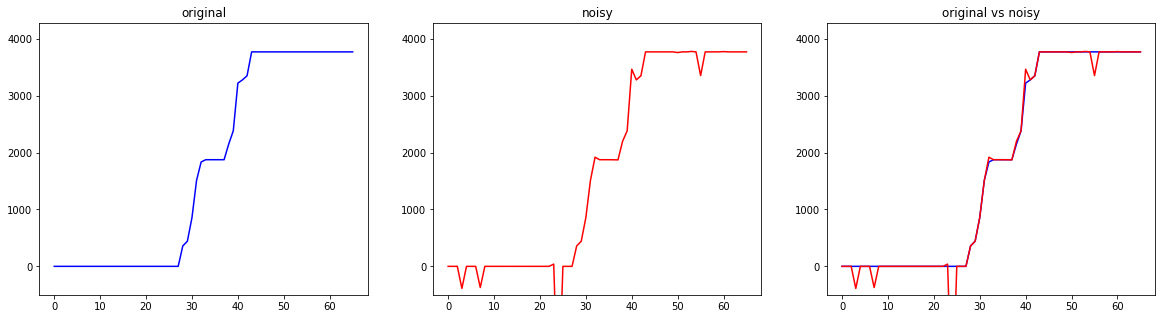

In [98]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

step_data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 358, 442, 856, 1511, 1834, 1874, 1874, 1874, 1874, 1874, 2148, 2381, 3220, 3277, 3349, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769], dtype=np.float64)

def lap_mechanism_gamma(original_data=[], loc=0, scale=0):
    def gammarnd(shpae, scale):
        def two_gammarnd_diff1():
            r = gamma.rvs(eshape, eloc, escale, size=2)

        rnd_diff_list=[]

        for i in range(len(step_data)):
            r = gamma.rvs(shape, 0, scale, 2)
            rnd_diff_list.append(r[0]-r[1])
        print('감마 분포 추출 노이즈 합계 :', sum(rnd_diff_list), '라플라스 분포 추출 노이즈 :', laprnd2(0, scale))
        
        return rnd_diff_list
    
    N = 79    #number of people
    slot_size = 66    #number of time period 
    sensitivity, epsilon = 7000, 1.0
    shape,scale = 1/N, (sensitivity/N)/(epsilon/slot_size)

    Gamma = gamma(a =  shape, scale = scale)
#     print(shape, scale)

    gamma_noise_list = gammarnd(shape, scale)

    noisy_data = np.array(step_data) + np.array(gamma_noise_list)
    return noisy_data


noisy_data = lap_mechanism_gamma(step_data)

# for i in range(len(noisy_data)):
#     print(step_data[i], ' + %.5f = %.5f'%(gamma_noise_list[i], noisy_data[i]))

    
# print('Gamma.pdf(%.5f, %f, %.5f)'%(shape, 0, scale))
# # # gamma distribution plot
# # gpdf = Gamma.pdf(shape, scale)
# # plt.title('Example - Estimated PDF of Gamma Distribution')
# # plt.plot(step_data, gpdf)

# # plt.show()    

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (20,5),  sharex = True)
for i in range(len(ax)):
    ax[i].set_ylim([-500, max(noisy_data+500)])
# ylim(-500,max(noisy_data)+500)
ax[0].plot(step_data, '-b');
ax[0].set_title('original')

ax[1].plot(noisy_data, '-r')
ax[1].set_title('noisy')

ax[2].plot(step_data, '-b')
ax[2].plot(noisy_data, '-r')
ax[2].set_title('original vs noisy')

noise_avg = 0
for i in range(10):
    noisy_data = lap_mechanism_gamma(step_data)
    noise = np.around(sum(noisy_data)-sum(step_data))
    noise_avg += noise
print('10회 노이즈 생성 결과의 평균 :', noise_avg/10)